# Mid Test : Annual Water Usage in Baltimore Dataset
### Topik Zulkarnain
***
Objective : Create a python script for the Use Case below, please upload the script after you finish.
The Problem is to predict annual water usage.

Instructions :

1. Load the dataset as a Pandas Series and split into two, one for model development (dataset.csv) and the other for validation (validation.csv).
2. Create summary of the dataset, with python function.
3. Create A line plot of a time series dataset, it will provide a lot of insight into the problem.
4. Group the annual data by decade and get an idea of the spread of observations for each decade and how this may be changing.
5. Create models using ARIMA
    5.1. Split the dataset into train and test sets directly <br>
    5.2.The first 50% of the dataset will be held back to train the model.<br>
    5.3. The remaining 50% of the dataset will be iterated and test the model.<br>
    5.4. The ARIMA(p,d,q) model requires three parameters and is traditionally configured manually.<br>
    5.5. Use an ARIMA(0,1,0) on the raw data may be a good starting point.<br>
    5.6. When model trained, a one-step prediction made ang the prediction stored for later evaluation.<br>
    5.7. The actual observation from the test dataset woll be added to the training dataset for the next iteration.<br>
    5.8. The predictions made during the enumeration of the test dataset will be evaluated and an RMSE score reported.<br>
6. Calculate the RMSE using the helper function from the scikit-learn library, from dataset only<br>
    6.1. Those RMSE will show you on average, how much the error/the model was wrong/gap between predection and expected value per capita per day for each prediction made.<br>

### Solution
***

### 1. Load data set and split into two parts, dataset and validation

In [96]:
import pandas as pd
df = pd.read_csv('water.csv', error_bad_lines=False)

b'Skipping line 82: expected 2 fields, saw 3\n'


In [97]:
df = df.rename(columns={'Baltmore city annual water use, liters per capita per day, 1885-1968': 'Liters'})

In [98]:
df.head()

,Year,Liters
0,1885,356
1,1886,386
2,1887,397
3,1888,397
4,1889,413


In [99]:
df['Year'] = pd.to_datetime(df['Year'],format='%Y')

In [100]:
df = df.set_index('Year')
df = df.astype('float64')

In [101]:
X_train, X_val = train_test_split(df, test_size = 0.5, shuffle=False)

### 2. Create Data summary

In [102]:
X_train.describe()

,Liters
count,39.000000
mean,471.538462
std,68.152633
min,344.000000
25%,437.000000
50%,469.000000
75%,503.000000
max,662.000000


### 3. Create Line Plot

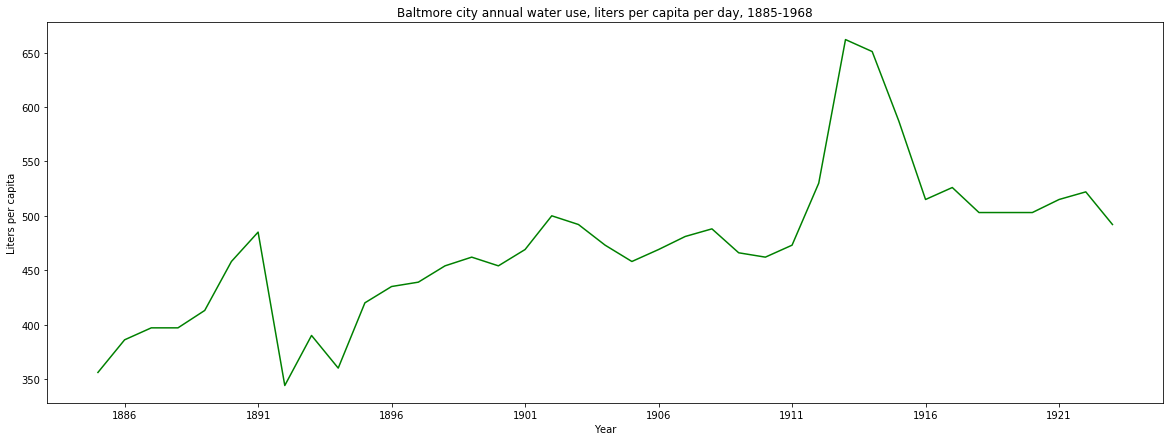

In [103]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,7))
plt.plot(X_train, color='g')
plt.xlabel('Year')
plt.ylabel('Liters per capita')
plt.title('Baltmore city annual water use, liters per capita per day, 1885-1968')
plt.show()

### 4. Group Annual year by decade

In [65]:
df.groupby(df.Year // 10*10 ).sum()

,Year,Liters
Year,,
1880,9435,1949
1890,18945,4247
1900,19045,4750
1910,19145,5412
1920,19245,4810
1930,19345,5026
1940,19445,6113
1950,19545,5731
1960,7846,2412


### 5. ARIMA MODEL

####  Trying to configure three parameters of ARIMA(p,q,d) manually

In [104]:
rolmean = X_train.rolling(window=4).mean()
rolstd = X_train.rolling(window=4).std()
print(rolmean, rolstd)

            Liters
Year              
1885-01-01     NaN
1886-01-01     NaN
1887-01-01     NaN
1888-01-01  384.00
1889-01-01  398.25
1890-01-01  416.25
1891-01-01  438.25
1892-01-01  425.00
1893-01-01  419.25
1894-01-01  394.75
1895-01-01  378.50
1896-01-01  401.25
1897-01-01  413.50
1898-01-01  437.00
1899-01-01  447.50
1900-01-01  452.25
1901-01-01  459.75
1902-01-01  471.25
1903-01-01  478.75
1904-01-01  483.50
1905-01-01  480.75
1906-01-01  473.00
1907-01-01  470.25
1908-01-01  474.00
1909-01-01  476.00
1910-01-01  474.25
1911-01-01  472.25
1912-01-01  482.75
1913-01-01  531.75
1914-01-01  579.00
1915-01-01  607.50
1916-01-01  603.75
1917-01-01  569.75
1918-01-01  532.75
1919-01-01  511.75
1920-01-01  508.75
1921-01-01  506.00
1922-01-01  510.75
1923-01-01  508.00                Liters
Year                 
1885-01-01        NaN
1886-01-01        NaN
1887-01-01        NaN
1888-01-01  19.373521
1889-01-01  11.116804
1890-01-01  28.837187
1891-01-01  40.475301
1892-01-01  61.627916
1

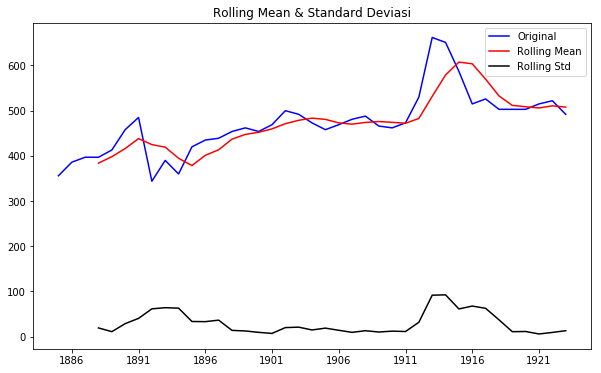

In [105]:
plt.figure(figsize=(10,6))

orig = plt.plot(X_train, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviasi')
plt.show(block=False)

In [107]:
# perform Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

print('Result of Dickey-Fuller Test:')
datatest = adfuller(X_train['Liters'],autolag='AIC')
dataoutput = pd.Series(datatest[0:4],index=['Test Statistics','p-value','#Lag Used','Number of Observations Used'])
for key,value in datatest[4].items():
    dataoutput['Critical Value (%s)'%key] = value
print(dataoutput)

Result of Dickey-Fuller Test:
Test Statistics                -2.311187
p-value                         0.168385
#Lag Used                       1.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64


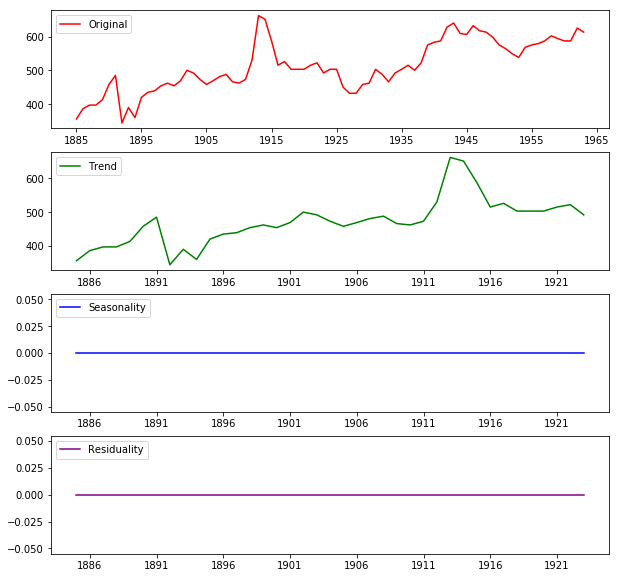

In [115]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(figsize=(10,10))

decomposition = seasonal_decompose(X_train)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df, label='Original', color = 'red')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color = 'green')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color ='blue')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuality', color='purple')
plt.legend(loc='upper left')

The next first step is to select the lag values for the Autoregression (AR) and Moving Average (MA) parameters, p and q respectively.

We can do this by reviewing Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots.

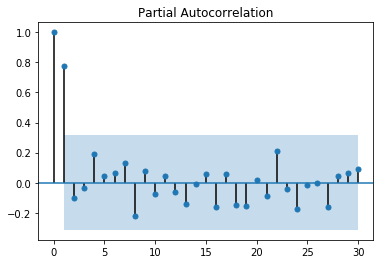

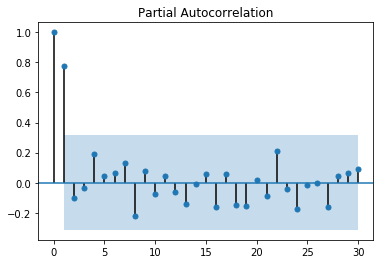

In [116]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(X_train, lags=30)

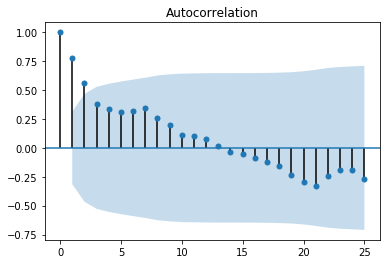

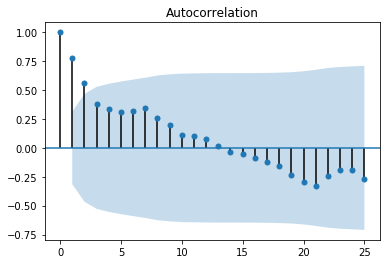

In [117]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(X_train, lags=25)

C:\Users\topikz064115\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\topikz064115\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\topikz064115\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtyp

Plotting ARIMA model


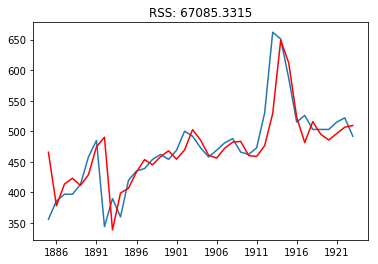

In [134]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(X_train, order=(1,0,2))
results = model.fit()
predictions = results.fittedvalues
plt.plot(X_train)
plt.plot(predictions, color='red')
plt.title('RSS: %.4F' % sum((results.fittedvalues-X_train['Liters'])**2))
print('Plotting ARIMA model')

In [128]:
results.summary2()

C:\Users\topikz064115\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\topikz064115\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARIMA
====================================================================
Model:              ARIMA            BIC:                 405.0867  
Dependent Variable: D.Liters         Log-Likelihood:      -195.27   
Date:               2019-10-10 16:07 Scale:               1.0000    
No. Observations:   38               Method:              css-mle   
Df Model:           3                Sample:              01-01-1886
Df Residuals:       35                                    01-01-1923
Converged:          1.0000           S.D. of innovations: 41.243    
AIC:                398.5364         HQIC:                400.867   
---------------------------------------------------------------------
                  Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
---------------------------------------------------------------------
const             3.5686    6.2241   0.5734  0.5701  -8.6305  15.7677
ar.L1.D.Liters    0.0114    0.1620   0.0703  0.9444  -0.3061   0.3289
ar.L2.D.Liters   -0.0908    0.1596  -0.5692  0.5729  -0.4036   0.2219
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
AR.1            0.0627            -3.3177           3.3183            -0.2470
AR.2            0.0627             3.3177           3.3183             0.2470
====================================================================

"""

C:\Users\topikz064115\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


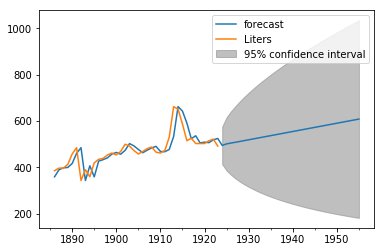

In [130]:
results.plot_predict(1,70)
x = results.forecast(steps=1)

In [139]:
predictions

Year
1885-01-01    465.737418
1886-01-01    378.107912
1887-01-01    413.555921
1888-01-01    423.172839
1889-01-01    411.329510
1890-01-01    429.019337
1891-01-01    474.480154
1892-01-01    490.245760
1893-01-01    338.636116
1894-01-01    398.944166
1895-01-01    406.941224
1896-01-01    433.533847
1897-01-01    453.562732
1898-01-01    445.127735
1899-01-01    458.386176
1900-01-01    468.083752
1901-01-01    454.326072
1902-01-01    469.345028
1903-01-01    502.650319
1904-01-01    485.536752
1905-01-01    460.918319
1906-01-01    456.162373
1907-01-01    472.144949
1908-01-01    482.135948
1909-01-01    483.437138
1910-01-01    460.243132
1911-01-01    458.817087
1912-01-01    476.443358
1913-01-01    528.978502
1914-01-01    648.991520
1915-01-01    611.923551
1916-01-01    522.729193
1917-01-01    481.642539
1918-01-01    515.744080
1919-01-01    495.128939
1920-01-01    485.654392
1921-01-01    496.376880
1922-01-01    506.617221
1923-01-01    509.503241
dtype: float64